In [ ]:
# Khai báo thư viện pandas
import pandas as pd

# Đọc file csv và lưu vào biến data
data=pd.read_csv('C:\\Users\\ADMIN\\Downloads\\HK2 NĂM 3\\Auto-Sales-data.csv')
print(data)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018            

In [ ]:
# xóa dữ liệu NaN
# Xử lý dữ liệu bị thiếu bằng hàm dropna() loại bỏ các hàng có giá trị thiếu trong DataFrame data
data=data.dropna(axis=0)
print(data)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018            

In [ ]:
# xóa dữ liệu trùng
# Sử dụng hàm drop_duplicates() để loại bỏ dữ liệu trùng lặp
data=data.drop_duplicates()
print(data)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018            

In [ ]:
# Tính tứ phân vị lọc outliers

# Lấy những cột cần sử dụng để phân cụm để lọc outlier
columns=['DAYS_SINCE_LASTORDER','SALES']

# Tính toán Quantile và IQR:
# sử dụng vòng lặp for để duyệt qua 2 cột khai ở trên
for column in columns:
    q1 = data[column].quantile(0.25) # tính toán tứ phân vị thứ nhất (Q1) cho mỗi cột. Q1 là giá trị mà 25% dữ liệu nằm dưới.
    q3 = data[column].quantile(0.75) # tính toán tứ phân vị thứ ba (Q3) cho mỗi cột.  Q3 là giá trị mà 75% dữ liệu nằm trên.
    iqr = q3 - q1 # tính IQR
    # sử dụng hàm loc() để lọc theo nhãn và chỉ giữ lại các hàng mà giá trị trong mỗi cột nằm trong một phạm vi khoảng trả giữa:
    data = data.loc[(data[column] > q1 - 1.5 * iqr) & (data[column] < q3 + 1.5 * iqr)]

# Đặt lại index cho dữ liệu liền mạch để sử dụng cho các bước sau
data.reset_index(drop=True,inplace=True)
print(data)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2663        10350               20     112.22               15  2244.40   
2664        10373               29     137.19                1  3978.51   
2665        10386               43     125.99                4  5417.57   
2666        10397               34      62.24                1  2116.16   
2667        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018            

In [ ]:
# chuẩn hóa min-max
# Dòng này tạo một DataFrame mới tên df bằng cách dùng loc() để lọc theo nhãn tất cả các hàng của hai cột 'SALES'
# và 'DAYS_SINCE_LASTORDER' từ DataFrame đã lọc outlier.
df = data.loc[:, [ 'SALES','DAYS_SINCE_LASTORDER']]

# Định nghĩa một hàm tên min_max_scaling để chuẩn hoá min-max
def min_max_scaling(data):
  for column in data.columns: # Sử dụng vòng lặp for để duyệt qua từng cột
    min_value = data[column].min() # Tính giá trị nhỏ nhất và lưu vào biến min_value
    max_value = data[column].max() # Tính giá trị lớn nhất và lưu vào biến max_value
    data[column] = (data[column] - min_value) / (max_value - min_value) # Công thức chuẩn hoá min-max
  return data # Trả về dataframe đã được chuẩn hoá

# Truyền tham số dataframe df cho hàm tính chuẩn hoá min-max
df_scaled = min_max_scaling(df)
print(df_scaled)


         SALES  DAYS_SINCE_LASTORDER
0     0.320002              0.223295
1     0.305923              0.203125
2     0.455744              0.187784
3     0.437306              0.172443
4     0.401548              0.154545
...        ...                   ...
2663  0.236065              0.818750
2664  0.468358              0.801989
2665  0.661128              0.793750
2666  0.218887              0.786364
2667  0.347923              0.775568

[2668 rows x 2 columns]


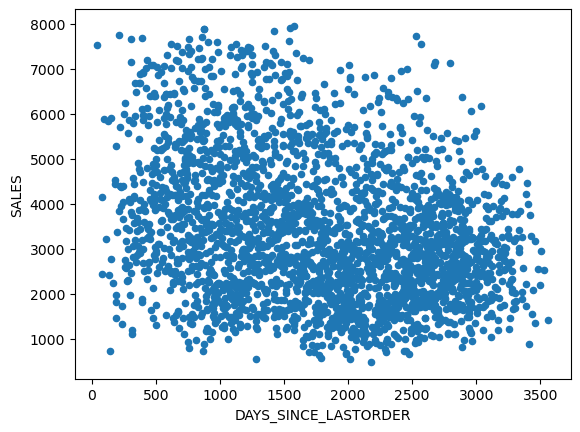

In [ ]:
# Vẽ biểu đồ phân tán trước khi phân cụm
# import thư viện matplotlib để tạo biểu đồ phân tán
import matplotlib.pyplot as plt

# sử dụng loại biểu đồ scatter với trục hoành là cột 'DAYS_SINCE_LASTORDER' và trục tung là cột 'SALES'
data.plot(kind = 'scatter', x = 'DAYS_SINCE_LASTORDER', y = 'SALES')

plt.show() # Hiển thị biểu đồ đã tạo

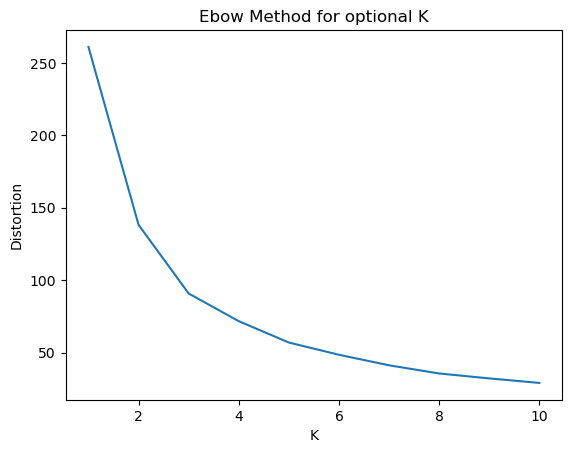

In [ ]:
# Xây dựng elbow
import numpy as np # khai báo thư viện numpy

# Sử dụng thư viện sklearn.cluster để tìm số cụm tối ưu
from sklearn.cluster import KMeans

#Tạo một danh sách k_range chứa các giá trị k từ 1 đến 10
k_range = range(1, 11)

# tạo 1 list rỗng
inertias = []

#Vòng lặp này sẽ thử nghiệm thuật toán K-Means với các giá trị k khác nhau để tìm ra k tối ưu.
for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans=kmeans.fit(df_scaled.to_numpy())
  inertias.append(kmeans.inertia_)

# Vẽ đồ thị elbow
plt.plot(k_range, inertias)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Ebow Method for optional K')
plt.show()

In [ ]:
# Dựa vào biểu đồ elbow ta chọn số cụm tối ưu k=3
# Khởi tạo đối tượng Kmeans với số cụm bằng 3
Kmean=KMeans(n_clusters=3)
Kmean.fit(df_scaled)

#Dòng này trích xuất nhãn cụm (cluster labels) từ đối tượng KMeans.
labels=Kmean.labels_

# Tạo ra cột Cluster
labels=pd.Series(labels,name='CLUSTER')

# Nối cột Cluster và dữ liệu đã chuẩn hoá
df_clustered=pd.concat([df_scaled,labels], axis=1)
print(df_clustered)


         SALES  DAYS_SINCE_LASTORDER  CLUSTER
0     0.320002              0.223295        2
1     0.305923              0.203125        2
2     0.455744              0.187784        2
3     0.437306              0.172443        2
4     0.401548              0.154545        2
...        ...                   ...      ...
2663  0.236065              0.818750        0
2664  0.468358              0.801989        0
2665  0.661128              0.793750        0
2666  0.218887              0.786364        0
2667  0.347923              0.775568        0

[2668 rows x 3 columns]


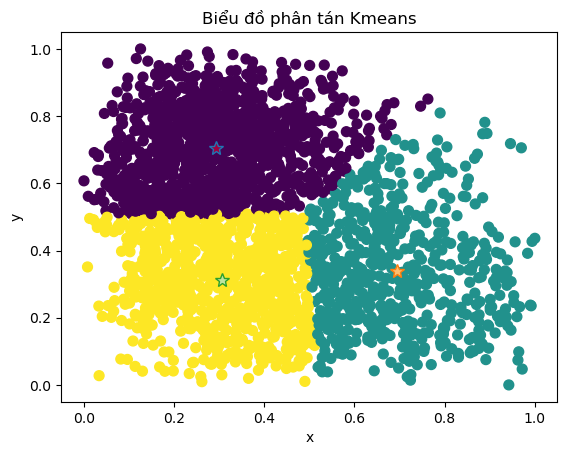

In [ ]:
# import thư viện matplotlib để tạo biểu đồ phân tán
import matplotlib.pyplot as plt

# Trích xuất cột 'SALES' từ DataFrame df_clustered và lưu trữ trong biến x_data.
x_data = df_clustered['SALES']

#Trích xuất cột 'DAYS_SINCE_LASTORDER' từ DataFrame df_clustered và lưu trữ trong biến y_data.
y_data = df_clustered['DAYS_SINCE_LASTORDER']

#Trích xuất cột 'CLUSTER' từ DataFrame df_clustered và lưu trữ trong biến cluster_labels.
cluster_labels = df_clustered['CLUSTER']

#Tạo biểu đồ phân tán theo cụm, trong đó: c=cluster_labels sử dụng nhãn cụm (cluster_labels) để tô màu cho các điểm theo cụm,
# s=50 thiết lập kích thước điểm là 50.
plt.scatter(x_data, y_data, c=cluster_labels,s=50)

# Thêm tiêu đề và nhãn cho các trục
plt.title('Biểu đồ phân tán Kmeans')
plt.xlabel('x')
plt.ylabel('y')


# Tính toán tâm cụm
centroids = df_clustered.groupby('CLUSTER').mean()

# Vẽ tâm cụm
for i in range(3):
    plt.plot(centroids.loc[i, 'SALES'], centroids.loc[i, 'DAYS_SINCE_LASTORDER'], '*',  markersize=10,
             markerfacecolor=plt.cm.Spectral(i/3))
# Hiển thị biểu đồ
plt.show()